# Discussion Post 2
Ethan Ruchotzke

In [12]:
# Imports
import numpy as np
%matplotlib widget
from matplotlib import pyplot as plt
import skimage
import random

In [13]:
# Import IO
# Open the cover image
cover = skimage.io.imread("../data/Discussion1/Ondra_sampling.jpg", as_gray=True)
cover = skimage.img_as_ubyte(cover)

In [14]:
# Create a uniformly generated stego image
msg = np.zeros(cover.shape)
for row in range(0, cover.shape[0]):
    for col in range(0, cover.shape[1]):
        msg[row,col] = 1 if random.getrandbits(1) else 0

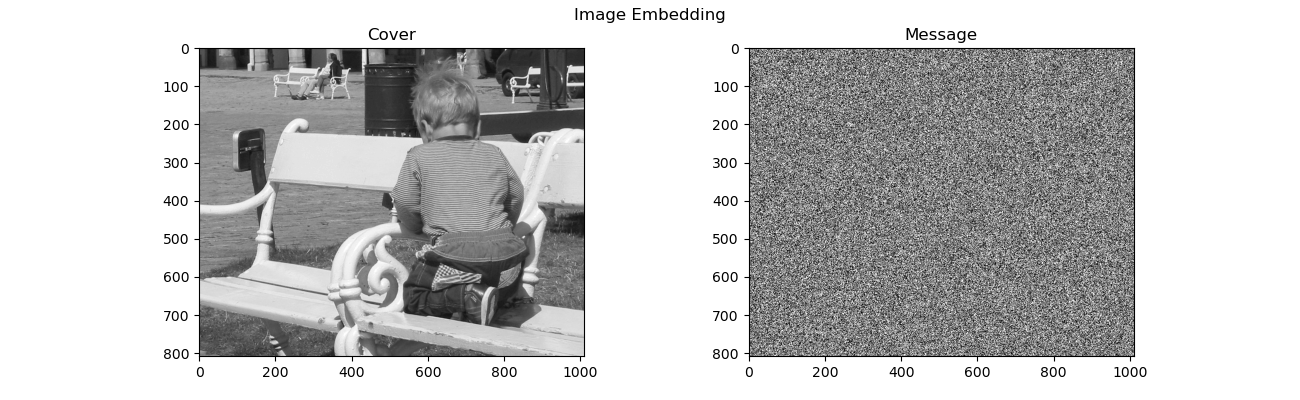

In [15]:
# Display both the cover image and the message image
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))
fig.suptitle("Image Embedding")
ax1.set_title("Cover")
ax1.imshow(cover, cmap='gray')
ax2.set_title("Message")
ax2.imshow(msg, cmap='gray')

In [18]:
# Embedding efficiency is the embed rate divided by the change rate.
# Embed rate is 1 (all pixels will be used)
embed_rate = 1

# change rate will likely be smaller (likely 0.5)
pixels_changed = 0
for row in range(0, cover.shape[0]):
    for col in range(0, cover.shape[1]):
        pixel = (cover[row,col] & 0x01 == 0x01)
        message_bit = (msg[row,col] == 1)
        if pixel != message_bit:
            pixels_changed += 1

# Calculate change rate
change_rate = pixels_changed / (cover.shape[0] * cover.shape[1])

In [19]:
# Calculate embedding efficiency (e)
print("Embed Rate: " + str(embed_rate))
print("Change Rate: " + str(change_rate))
print("Embed Efficiency (e): " + str(embed_rate / change_rate))

Embed Rate: 1
Change Rate: 0.49980884227036565
Embed Efficiency (e): 2.0007649233605633
